In [18]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from citipy import citipy
from random import uniform
from config import api_key
from datetime import datetime

In [2]:
# Create a df to lat, lon 
column_names = ["City", "Country"]
cities_df = pd.DataFrame(columns=column_names)
cities_df

,City,Country


## Generate a list of cites from latitudes and longitudes

In [3]:
# Randomly generate a list of 1500 cities. Use 10 to test. 50 is good to test for duplicates. 
for x in range(200):
    lat, lng = np.random.uniform(low=-90.000, high=90.000), np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lat, lng)
    cities_df = cities_df.append({"City": city.city_name,"Country": city.country_code,}, ignore_index=True)
cities_df.head()

,City,Country
0,torbay,ca
1,san patricio,mx
2,mandalgovi,mn
3,coquimbo,cl
4,bengkulu,id


In [4]:
#Remove duplicate cities
cities_df = cities_df.drop_duplicates(subset='City').reset_index()
cities_df.count()

index      136
City       136
Country    136
dtype: int64

## Perform API Calls

In [5]:
#Create a df to add all the data from the API calls.
column_names = ["City","Country","Temperature (F)",
                "Latitude","Longitude","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]
clean_cities_df = pd.DataFrame(columns=column_names)
clean_cities_df.head()

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)


In [6]:
# Loop through the list of cities and add the data to the df.
url = "http://api.openweathermap.org/data/2.5/weather?"

row_count = 1

print("Beginning Data Retrieval")
for index, row in cities_df.iterrows():
    target_city = row["City"]
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","+")
    city_data = requests.get(target_url).json()
    if city_data["cod"] == "404":
        print("City not found, skipping...")

    else:
        clean_cities_df.set_value(index, "City", city_data["name"])
        clean_cities_df.set_value(index, "Country", city_data["sys"]["country"])
        clean_cities_df.set_value(index, "Temperature (F)", city_data["main"]["temp"])
        clean_cities_df.set_value(index, "Latitude", city_data["coord"]["lat"])
        clean_cities_df.set_value(index, "Longitude", city_data["coord"]["lon"])
        clean_cities_df.set_value(index, "Humidity (%)", city_data["main"]["humidity"])
        clean_cities_df.set_value(index, "Cloudiness (%)", city_data["clouds"]["all"])
        clean_cities_df.set_value(index, "Wind Speed (mph)", city_data["wind"]["speed"])
        
        print("------------------------")
        print("Proceesing: City # " , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
        print(target_url)
        row_count += 1

Beginning Data Retrieval
------------------------
Proceesing: City #  1  |  Torbay CA
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=torbay
------------------------
Proceesing: City #  2  |  San Patricio MX
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=san+patricio
------------------------
Proceesing: City #  3  |  Mandalgovi MN
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=mandalgovi
------------------------
Proceesing: City #  4  |  Coquimbo CL
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=coquimbo
------------------------
Proceesing: City #  5  |  Bengkulu ID
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=bengkulu
------------------------
Proceesing: City #  6  |  Wuwei CN
http://api.openweathermap.org/da

------------------------
Proceesing: City #  47  |  Portland US
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=portland
------------------------
Proceesing: City #  48  |  Ketchikan US
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=ketchikan
------------------------
Proceesing: City #  49  |  Tumen CN
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=tumen
------------------------
Proceesing: City #  50  |  Bredasdorp ZA
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=bredasdorp
------------------------
Proceesing: City #  51  |  Punta Arenas CL
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=punta+arenas
------------------------
Proceesing: City #  52  |  Georgetown GY
http://api.openweathermap.org/data/2.5/weather

------------------------
Proceesing: City #  93  |  Moroni KM
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=moroni
City not found, skipping...
City not found, skipping...
------------------------
Proceesing: City #  94  |  San Jose US
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=san+jose
------------------------
Proceesing: City #  95  |  Yulara AU
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=yulara
------------------------
Proceesing: City #  96  |  Tommot RU
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=tommot
------------------------
Proceesing: City #  97  |  Hermanus ZA
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=hermanus
------------------------
Proceesing: City #  98  |  Nizhnevartovsk RU
http:/

In [9]:
clean_cities_df

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Torbay,CA,39.2,47.67,-52.73,100,75,9.17
1,San Patricio,MX,87.8,19.22,-104.7,70,20,11.41
2,Mandalgovi,MN,-9.4,45.76,106.27,44,0,3.02
3,Coquimbo,CL,61.03,-29.95,-71.34,92,0,3.36
4,Bengkulu,ID,76.24,-3.8,102.27,100,92,8.16
5,Wuwei,CN,13.69,37.93,102.64,69,36,1.57
6,Koukkuniemi,FI,41,60.15,24.76,93,75,13.87
7,Atuona,PF,78.58,-9.8,-139.03,100,80,12.97
8,Amparihy,MG,71.6,-25.02,46.97,88,75,4.7
9,Ushuaia,AR,33.8,-54.8,-68.3,98,90,26.4


In [10]:
clean_cities_df.count()

City                123
Country             123
Temperature (F)     123
Latitude            123
Longitude           123
Humidity (%)        123
Cloudiness (%)      123
Wind Speed (mph)    123
dtype: int64

In [11]:
#Reset the index
clean_cities_df = clean_cities_df.reset_index()
del clean_cities_df['index']
clean_cities_df.head()

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Torbay,CA,39.2,47.67,-52.73,100,75,9.17
1,San Patricio,MX,87.8,19.22,-104.7,70,20,11.41
2,Mandalgovi,MN,-9.4,45.76,106.27,44,0,3.02
3,Coquimbo,CL,61.03,-29.95,-71.34,92,0,3.36
4,Bengkulu,ID,76.24,-3.8,102.27,100,92,8.16


In [10]:
# Save data to a CSV file
#clean_cities_df.to_csv("City_Data.csv")

## Latitude vs. Temperature 

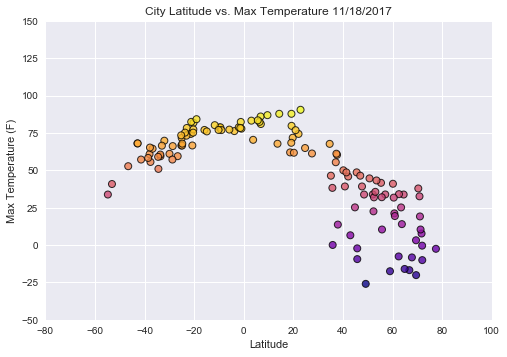

In [22]:
#Build a scatter plot for Latitude vs. Temperature

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Temperature (F)"], c=clean_cities_df["Temperature (F)"],
            edgecolor="black", linewidths=1, marker="o",
            cmap='plasma', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-50, 150])

# Save the figure
#plt.savefig("output_analysis/Latitude_Temperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity (%) 

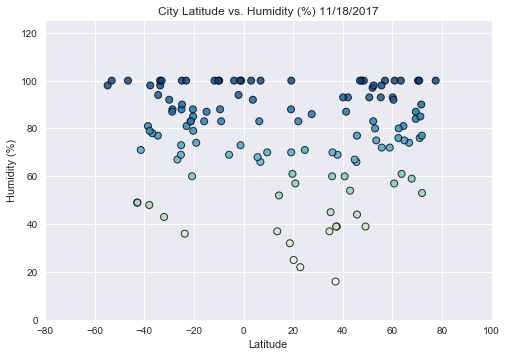

In [24]:
#Build a scatter plot for Latitude vs. Humidity (%)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Humidity (%)"], c=clean_cities_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='GnBu', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Humidity (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([0, 125])

# Save the figure
#plt.savefig("output_analysis/Latitude_Temperature.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness (%) 

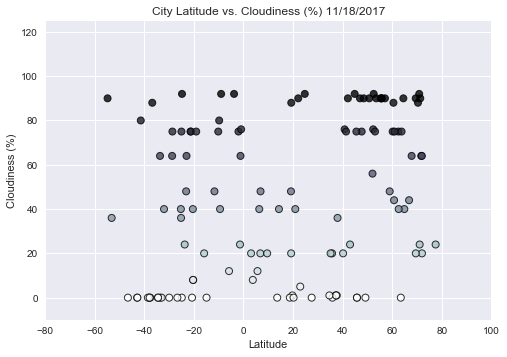

In [25]:
#Build a scatter plot for Latitude vs. Cloudiness (%)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Cloudiness (%)"], c=clean_cities_df["Cloudiness (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='bone_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Cloudiness (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 125])

# Save the figure
#plt.savefig("output_analysis/Latitude_Temperature.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed (mph) 

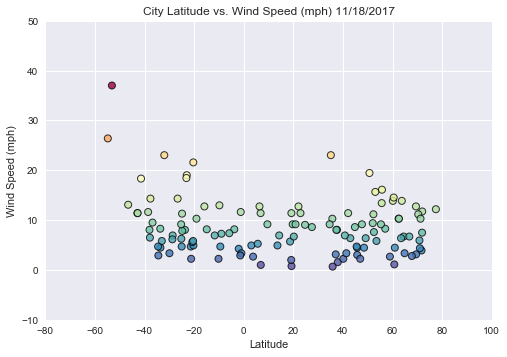

In [26]:
#Build a scatter plot for Latitude vs. Wind Speed (%)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Wind Speed (mph)"], c=clean_cities_df["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='Spectral_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Wind Speed (mph) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 50])

# Save the figure
#plt.savefig("output_analysis/Latitude_Temperature.png")

# Show plot
plt.show()